In [1]:
import torch
import numpy as np
from torchvision.transforms import transforms as T
import torch.nn as nn
import sys
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
sys.path.append('..')
sys.path.append('../dataset_loader')
sys.path.append('../model')
from config import *
from mpl_toolkits.axes_grid1 import make_axes_locatable

from dataset_loader.image_loader import *
from model.resunet import *
from utils import *

In [2]:
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")

for ix,m in enumerate(os.listdir('../model_results/supervised/green/')):
    print(ix,m)

model_name = os.listdir('../model_results/supervised/green/')[6]
print(model_name)

0 c-resunet_15.h5
1 c-resunet_2.h5
2 c-resunet_0.h5
3 c-resunet_5.h5
4 c-resunet_12.h5
5 c-resunet_7.h5
6 c-resunet_21.h5
7 c-resunet_4.h5
8 c-resunet_13.h5
9 c-resunet_21
10 c-resunet_3.h5
11 c-resunet_9.h5
12 c-resunet_1.h5
13 2path_2head_2
14 c-resunet_19.h5
c-resunet_21.h5


In [3]:
c0=True

model = nn.DataParallel(c_resunet(arch='c-ResUnet', n_features_start = 16, n_out = 1,c0=c0,
        pretrained = False, progress= True)).to(device)
model.load_state_dict(torch.load('../model_results/supervised/green/{}'.format(model_name)))

including c0 in the network
Initializing conv2d weights with Kaiming He normal


<All keys matched successfully>

In [4]:
test = True
dataset = 'green'

str(root).replace('notebook', '') + '/data/test/original_images/'

transform = T.Compose([T.Lambda(lambda x: x * 1. / 255),
                       T.ToTensor(),
                       #T.Resize((1040,1400))
                      #T.Lambda(lambda x: x.permute(2, 0, 1))
                       ])

cells_images = CellsLoader(Path(str(root).replace('notebook', '') + '/data/test/original_images/'),
                            Path(str(root).replace('notebook', '') + '/data/test/original_masks/'), 
                               val_split=0.3, transform = transform, test = test)

In [36]:
#cells_images = CellsLoader(root + "/DATASET/train_val/crop_augmented/images/",
#                           root + "/DATASET/train_val/crop_augmented/masks/", 
#                           val_split=0.3, transform = transform, ae = ae, test = False)

batch_size = 8
test_loader = DataLoader(cells_images, batch_size=batch_size)

In [37]:
x, y = next(iter(test_loader))

x.size()

y.size()

In [40]:
model.eval()
with torch.no_grad():
    heatmap = model(x.to(device))
    #heatmap = 1 - heatmap

In [32]:
#torch.save(heatmap, 'yellowed_red.pt')

In [41]:
save = True

path alredy exixts
path alredy exixts
path alredy exixts
path alredy exixts
path alredy exixts
path alredy exixts
path alredy exixts


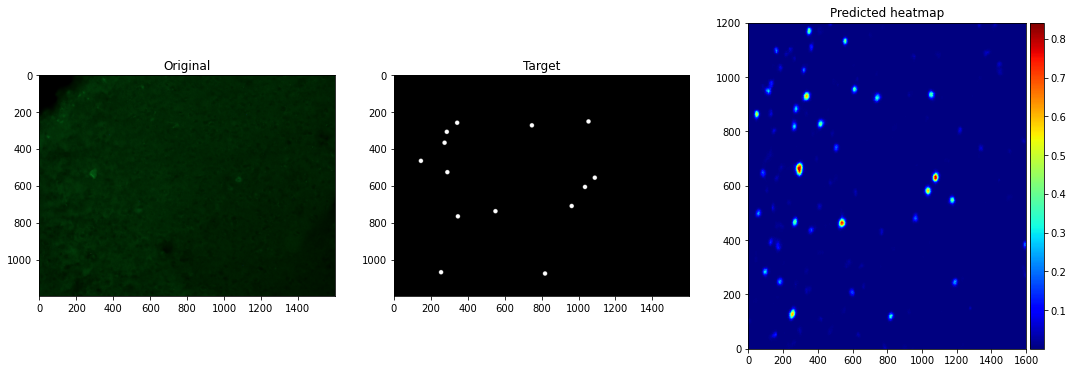

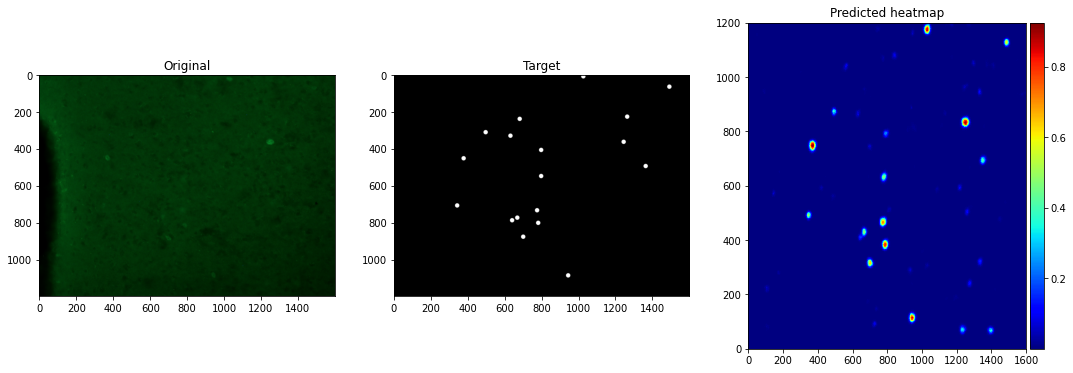

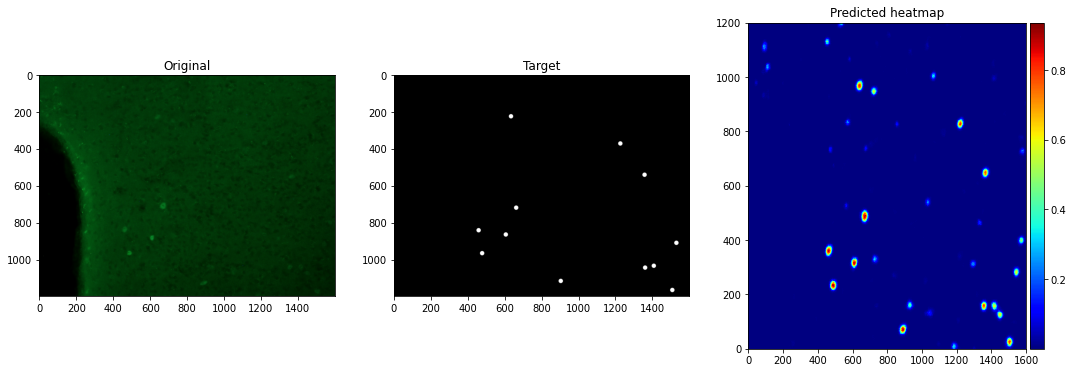

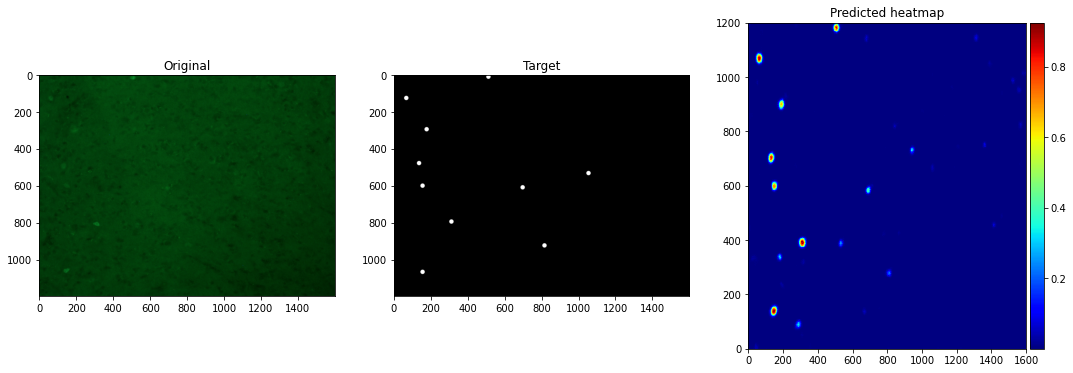

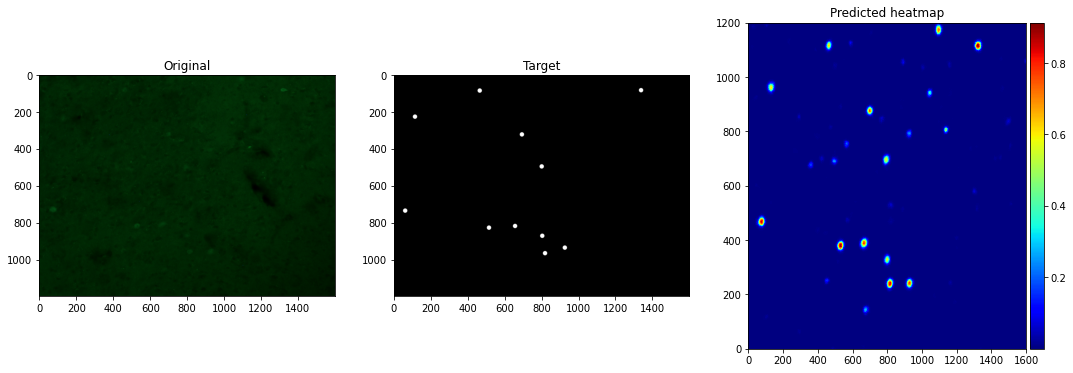

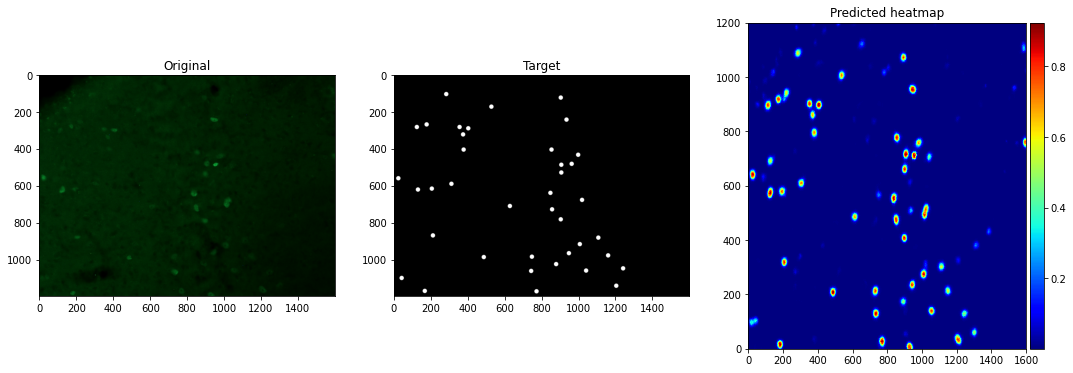

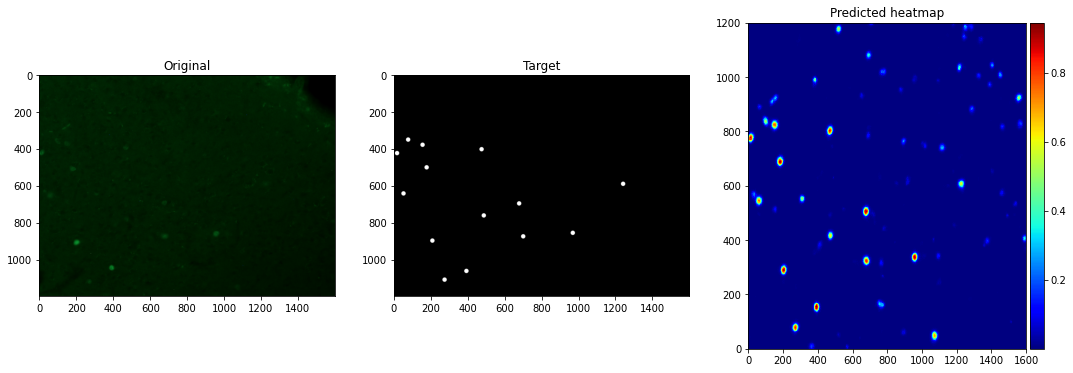

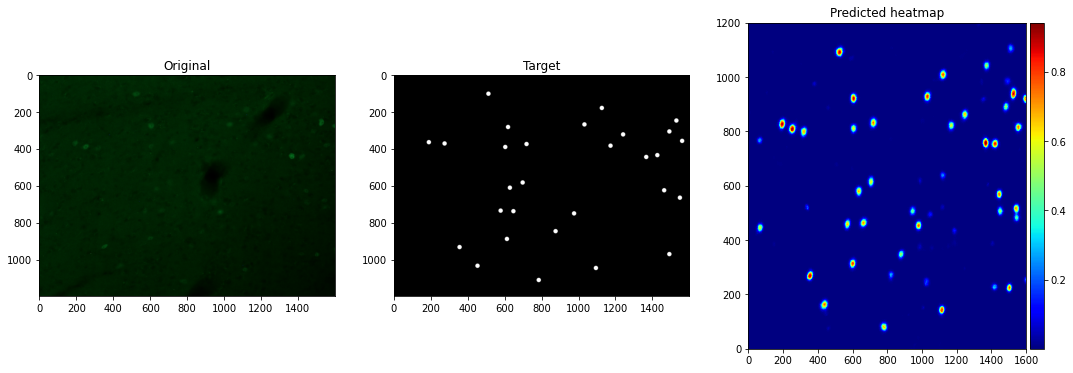

In [42]:
for i in range(heatmap.size()[0]):
    
#     print(test_ids[i+start])
    original = x[i].permute(1,2,0)
    target = y[i].permute(1,2,0)
    heat_map = heatmap[i]

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
       
    im = axes[0].imshow(original)
    axes[0].set_title('Original')


    if heat_map.shape[0]==3:
        im = axes[1].imshow(original)
        axes[1].set_title('Target')
    
        im = axes[2].imshow(heat_map.cpu().permute(1,2,0))
        axes[2].set_title('reconstructed')
        
    else:
        im = axes[1].imshow(np.squeeze(target), cmap='gray')
        axes[1].set_title('Target')
    

        im = axes[2].pcolormesh(np.flipud(heat_map.cpu().detach().squeeze()), cmap='jet')
        divider = make_axes_locatable(axes[2])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)
        axes[2].set_title('Predicted heatmap') 
    
    if save:
        if os.path.exists('../figure_results/{}/{}'.format(model_name.split('.')[0], dataset)):
            print('path alredy exixts')
        else:
            os.makedirs('../figure_results/{}/{}'.format(model_name.split('.')[0], dataset))
        
        plt.savefig('../figure_results/{}/{}/{}_{}.png'.format(model_name.split('.')[0], \
                                                               dataset, model_name.split('.')[0],i))